In [221]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [222]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [223]:
NUM_CLASSES = 6

# 学習データ読み込み

In [224]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [225]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [227]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [228]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_21 (Dropout)        (None, 42)                0         
                                                                 
 dense_31 (Dense)            (None, 20)                860       
                                                                 
 dropout_22 (Dropout)        (None, 20)                0         
                                                                 
 dense_32 (Dense)            (None, 10)                210       
                                                                 
 dense_33 (Dense)            (None, 5)                 55        
                                                                 
Total params: 1125 (4.39 KB)
Trainable params: 1125 (4.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [229]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [230]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [231]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


2024-01-10 10:51:23.208931: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of 5 which is outside the valid range of [0, 5).  Label values: 1 0 3 1 2 4 0 4 4 4 0 1 1 2 1 0 2 4 2 2 1 3 1 4 3 0 3 2 3 2 4 2 1 0 0 1 0 2 2 5 3 4 4 5 5 2 2 0 2 2 1 5 2 1 4 0 0 1 0 5 2 2 4 0 0 2 1 2 2 0 3 0 3 5 1 1 1 0 3 5 1 4 3 1 1 4 0 3 3 3 3 3 3 5 3 4 4 2 5 5 3 5 0 4 2 1 0 3 1 3 4 2 1 3 1 2 4 0 0 1 2 5 2 1 0 5 1 5


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/tmp/myenv/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/tmp/myenv/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/tmp/myenv/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 701, in start

  File "/tmp/myenv/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/tmp/myenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in dispatch_queue

  File "/tmp/myenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 523, in process_one

  File "/tmp/myenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 429, in dispatch_shell

  File "/tmp/myenv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 767, in execute_request

  File "/tmp/myenv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 429, in do_execute

  File "/tmp/myenv/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/tmp/myenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell

  File "/tmp/myenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3106, in _run_cell

  File "/tmp/myenv/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/tmp/myenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3311, in run_cell_async

  File "/tmp/myenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3493, in run_ast_nodes

  File "/tmp/myenv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipykernel_16222/2889966517.py", line 1, in <module>

  File "/tmp/myenv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/tmp/myenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/tmp/myenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/tmp/myenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/tmp/myenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/tmp/myenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/tmp/myenv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/tmp/myenv/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/tmp/myenv/lib/python3.10/site-packages/keras/src/losses.py", line 143, in __call__

  File "/tmp/myenv/lib/python3.10/site-packages/keras/src/losses.py", line 270, in call

  File "/tmp/myenv/lib/python3.10/site-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/tmp/myenv/lib/python3.10/site-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of 5 which is outside the valid range of [0, 5).  Label values: 1 0 3 1 2 4 0 4 4 4 0 1 1 2 1 0 2 4 2 2 1 3 1 4 3 0 3 2 3 2 4 2 1 0 0 1 0 2 2 5 3 4 4 5 5 2 2 0 2 2 1 5 2 1 4 0 0 1 0 5 2 2 4 0 0 2 1 2 2 0 3 0 3 5 1 1 1 0 3 5 1 4 3 1 1 4 0 3 3 3 3 3 3 5 3 4 4 2 5 5 3 5 0 4 2 1 0 3 1 3 4 2 1 3 1 2 4 0 0 1 2 5 2 1 0 5 1 5
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_421939]

In [ ]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

 1/11 [=>............................] - ETA: 0s - loss: 0.4063 - accuracy: 0.9297

11/11 [==============================] - 0s 3ms/step - loss: 0.3250 - accuracy: 0.9480


In [ ]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 81ms/step
[9.6141201e-01 5.3662513e-03 2.6784965e-09 3.4861494e-09 6.3462538e-04
 3.2587163e-02]
0


# 混同行列

43/43 [==============================] - 0s 1ms/step


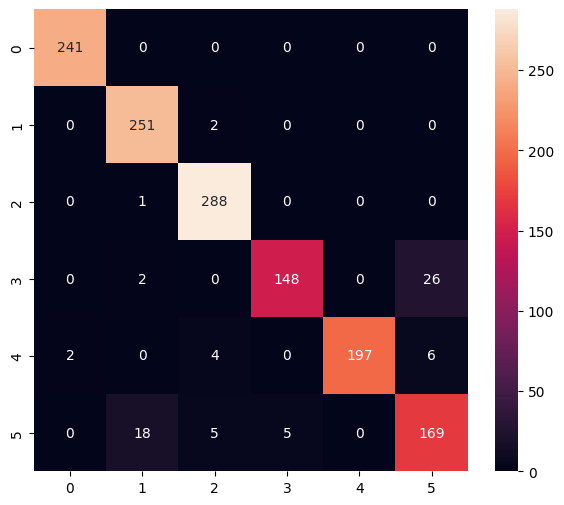

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       241
           1       0.92      0.99      0.96       253
           2       0.96      1.00      0.98       289
           3       0.97      0.84      0.90       176
           4       1.00      0.94      0.97       209
           5       0.84      0.86      0.85       197

    accuracy                           0.95      1365
   macro avg       0.95      0.94      0.94      1365
weighted avg       0.95      0.95      0.95      1365



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [ ]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

/tmp/myenv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier_3.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmp7tbp8nw5/assets


INFO:tensorflow:Assets written to: /tmp/tmp7tbp8nw5/assets
2024-01-10 10:14:37.289246: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-01-10 10:14:37.289277: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-01-10 10:14:37.289552: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp7tbp8nw5
2024-01-10 10:14:37.291628: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-01-10 10:14:37.291655: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmp7tbp8nw5
2024-01-10 10:14:37.295803: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-01-10 10:14:37.345565: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: /tmp/tmp7tbp8nw5
2024-01-10 10:14:37.360695: I tensorflow/cc/saved_model/loader.cc:316] SavedModel

6700

# 推論テスト

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 1.12 ms, sys: 73 µs, total: 1.19 ms
Wall time: 875 µs


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.6141207e-01 5.3662290e-03 2.6784868e-09 3.4861296e-09 6.3462398e-04
 3.2587081e-02]
0
